In [6]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats

# Untuk kebutuhan visual
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Untuk feature engineering
from sklearn.model_selection import train_test_split

In [7]:
# Load data
data = pd.read_excel('dataset.xlsx')

# Menampilkan data


In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
# informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# cek missing value
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# cek data duplicate
data.duplicated().sum()

5268

In [12]:
# Dictionary untuk menyimpan hasil
columns_with_duplicates = {}

# Iterasi melalui setiap kolom untuk mengecek duplikat
for column in data.columns:
    if data[column].duplicated().any():  # Cek jika ada duplikat di kolom tersebut
        columns_with_duplicates[column] = True
    else:
        columns_with_duplicates[column] = False

# Menampilkan kolom yang memiliki data duplikat
for column, has_duplicates in columns_with_duplicates.items():
    if has_duplicates:
        print(f"Kolom '{column}' memiliki data duplikat.")
    else:
        print(f"Kolom '{column}' tidak memiliki data duplikat.")

Kolom 'InvoiceNo' memiliki data duplikat.
Kolom 'StockCode' memiliki data duplikat.
Kolom 'Description' memiliki data duplikat.
Kolom 'Quantity' memiliki data duplikat.
Kolom 'InvoiceDate' memiliki data duplikat.
Kolom 'UnitPrice' memiliki data duplikat.
Kolom 'CustomerID' memiliki data duplikat.
Kolom 'Country' memiliki data duplikat.


In [13]:
data = data.dropna()

In [14]:
data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
minus = data[data['Quantity'] < 0]
minus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:

data = data.drop(data[data['Quantity'] < 0].index)

In [17]:
# Menambahkan kolom baru
data['TotalPrice'] = data['UnitPrice']*data['Quantity']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Negara Manakah yang memiliki Transaksi terbanyak?

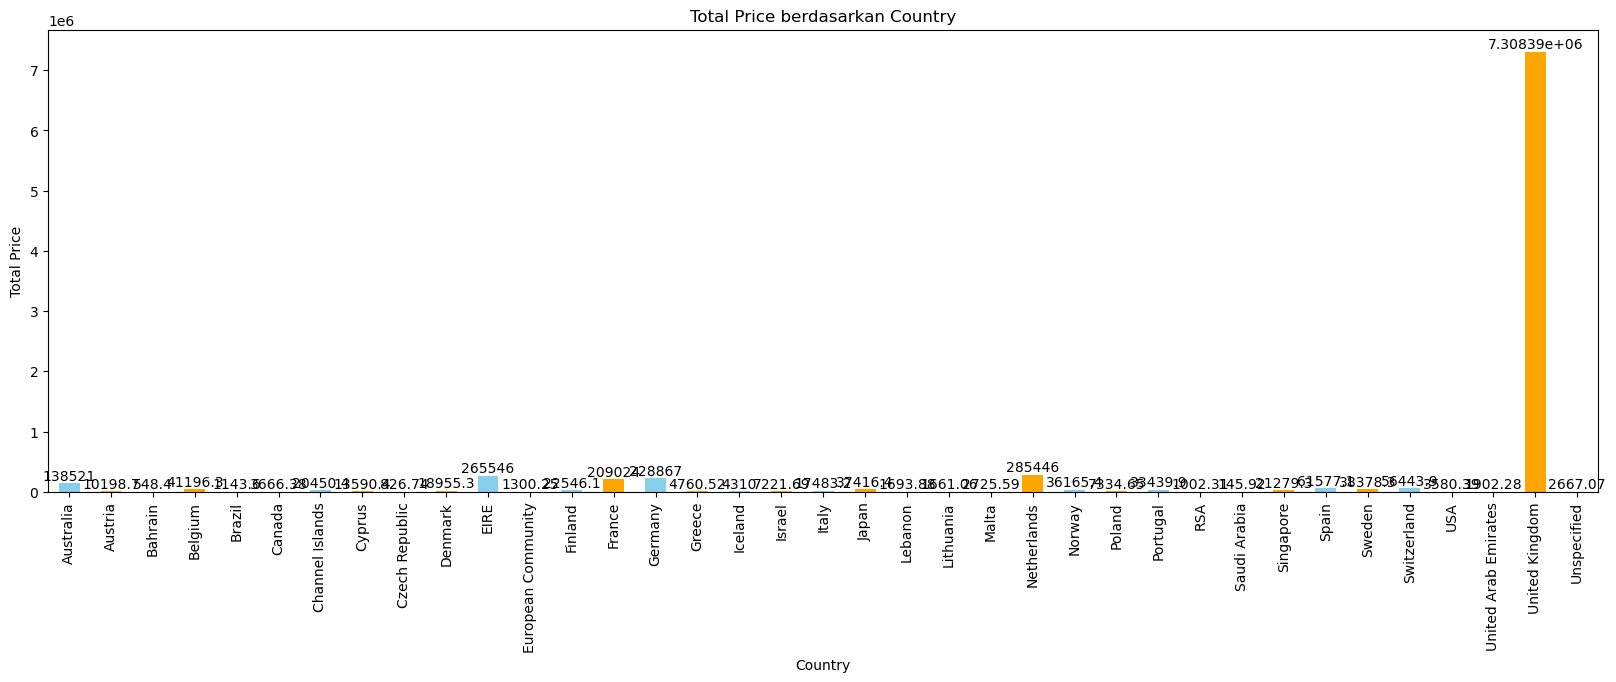

In [18]:
fig,ax1 = plt.subplots(figsize=(20,6))
Country= data.groupby('Country')['TotalPrice'].sum().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Country')
plt.ylabel('Total Price')
plt.title('Total Price berdasarkan Country')
Country.bar_label(Country.containers[0])

#memperlihatkan plot
plt.show()

In [19]:
import warnings
warnings.filterwarnings('ignore')


In [20]:
# import datetime as dt
# NOW = dt.datetime(2024,2,2)

In [21]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

- The Earliest transaction 01 Dec 2010
- The Latest transaction 09 Dec 2011

In [22]:
print(data['InvoiceDate'].min(), data['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


In [27]:
data['hist']=data['InvoiceDate'].max() - data['InvoiceDate']
data['hist'].astype('timedelta64[s]')
data['hist']=data['hist'] / np.timedelta64(1, 's')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,hist
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,32243040.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,32243040.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,32243040.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,32243040.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,32243040.0


In [28]:
rfmTable = data.groupby('CustomerID').agg({'hist': lambda x:x.min(), # Recency
                                        'CustomerID': lambda x: len(x), # Frequency
                                        'TotalPrice': lambda x: x.sum()}) # Monetary Value

rfmTable.rename(columns={'hist': 'recency',
                         'CustomerID': 'frequency',
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [29]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,28090140.0,1,77183.60
12347.0,161880.0,182,4310.00
12348.0,6478620.0,31,1797.24
12349.0,1565940.0,73,1757.55
12350.0,26772540.0,17,334.40


In [46]:

rfmTable.to_csv('rfm.csv', index=False)

In [30]:
data[data['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,hist
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,28090140.0


RFM analysis involves categorising R,F and M into 3 or more categories. For convenience, let's create 4 categories based on quartiles (quartiles roughly divide the sample into 4 segments equal proportion)

In [31]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

         recency  frequency  monetary_value
0.25   1474770.0       17.0         307.245
0.50   4327380.0       41.0         674.450
0.75  12227400.0      100.0        1661.640 <class 'pandas.core.frame.DataFrame'>


In [32]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 1474770.0, 0.5: 4327380.0, 0.75: 12227400.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'monetary_value': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.64}}

In [33]:
## for Recency

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

## for Frequency and Monetary value

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


In [34]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [35]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [36]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346.0,28090140.0,1,77183.60,4,4,1,441
12347.0,161880.0,182,4310.00,1,1,1,111
12348.0,6478620.0,31,1797.24,3,3,1,331
12349.0,1565940.0,73,1757.55,2,2,1,221
12350.0,26772540.0,17,334.40,4,4,3,443


In [37]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
14646.0,88680.0,2080,280206.02,1,1,1,111
18102.0,3600.0,431,259657.30,1,1,1,111
17450.0,688860.0,337,194550.79,1,1,1,111
14911.0,75360.0,5677,143825.06,1,1,1,111
14156.0,784560.0,1400,117379.63,1,1,1,111
...,...,...,...,...,...,...,...
17102.0,22560120.0,1,25.50,4,4,4,444
15823.0,32132520.0,1,15.00,4,4,4,444
17763.0,22717500.0,1,15.00,4,4,4,444


In [38]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111     9456.797002
112     1173.286782
113      542.578125
114      292.543333
121     4471.289524
           ...     
434      200.651500
441    17815.672000
442      961.328333
443      395.712286
444      158.924609
Name: monetary_value, Length: 61, dtype: float64

In [39]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         4339 non-null   float64
 1   frequency       4339 non-null   int64  
 2   monetary_value  4339 non-null   float64
 3   R_Quartile      4339 non-null   int64  
 4   F_Quartile      4339 non-null   int64  
 5   M_Quartile      4339 non-null   int64  
 6   RFMClass        4339 non-null   object 
 7   Total Score     4339 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 305.1+ KB
               recency  frequency  monetary_value  R_Quartile  F_Quartile  \
CustomerID                                                                  
12346.0     28090140.0          1        77183.60           4           4   
12347.0       161880.0        182         4310.00           1           1   
12348.0      6478620.0         31         1797.24           3       

In [42]:
print("Best Customers: ",len(rfmSeg[rfmSeg['RFMClass']=='111']))
print('Loyal Customers: ',len(rfmSeg[rfmSeg['F_Quartile']==1]))
print("Big Spenders: ",len(rfmSeg[rfmSeg['M_Quartile']==1]))
# print('Almost Lost: ', len(rfmSeg[rfmSeg['RFMClass']=='244']))
print('Lost Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='411']))
print('Lost Cheap Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='444']))

Best Customers:  437
Loyal Customers:  1080
Big Spenders:  1085
Lost Customers:  21
Lost Cheap Customers:  384


In [41]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     9456.797002
4     4094.928604
5     2067.811077
6     1798.883322
7     1012.692022
8      757.507281
9      825.994377
10     368.138730
11     239.132610
12     158.924609
Name: monetary_value, dtype: float64

<Axes: xlabel='Total Score'>

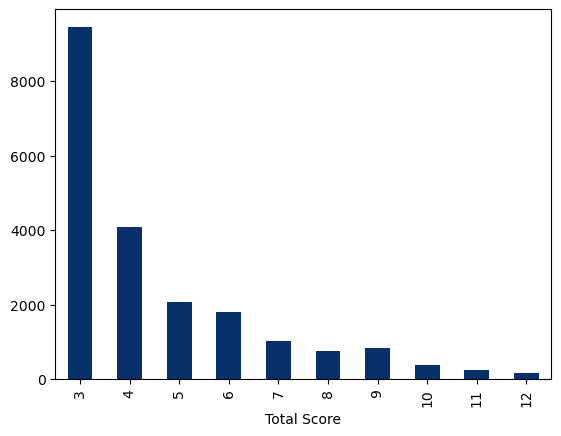

In [43]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')


<Axes: xlabel='Total Score'>

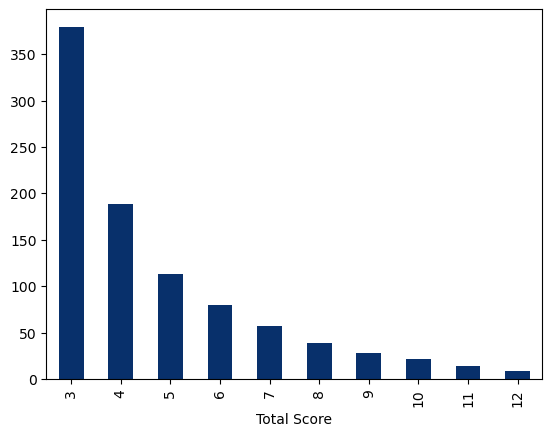

In [44]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total Score'>

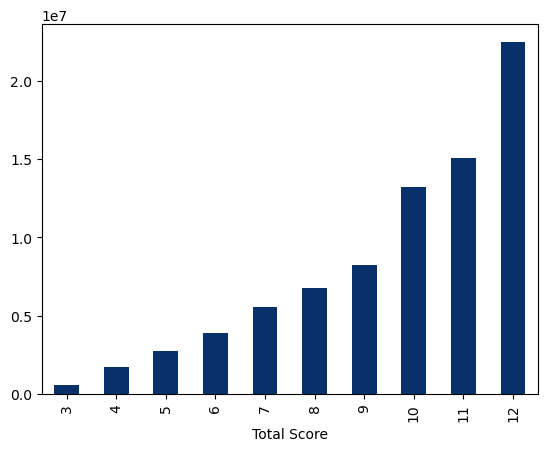

In [45]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')